# KNN

### Docente: M.Sc. Richard Fernández 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [36]:
data = pd.read_csv('E:/Bases/Kaggle/Social Network Ads/Social_Network_Ads.csv')

In [37]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [39]:
#data['Purchased'] = data.Purchased.astype(object)

In [40]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

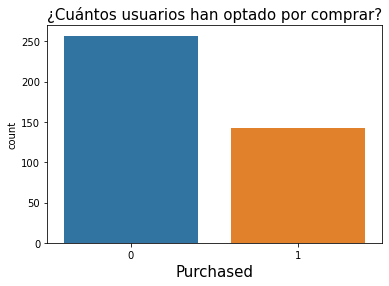

In [41]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

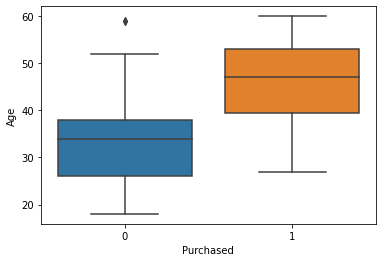

In [8]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

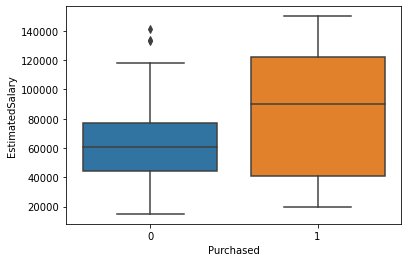

In [9]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


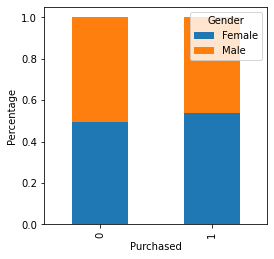

In [10]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [45]:
X = data.iloc[:,[2, 3]].values
y = data.iloc[:,-1].values

In [46]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [47]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [50]:
X_train[0:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [51]:
X_test[0:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [52]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [53]:
X_train[0:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [54]:
X_test[0:5]

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

In [55]:
classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [58]:
y_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
confusion_matrix(y_test, y_pred)

array([[54,  4],
       [ 1, 21]], dtype=int64)

Confusion matrix, without normalization
[[54  4]
 [ 1 21]]
Normalized confusion matrix
[[0.93103448 0.06896552]
 [0.04545455 0.95454545]]


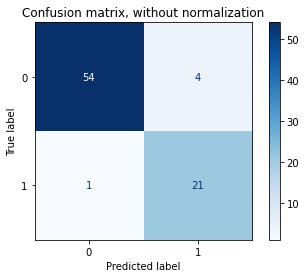

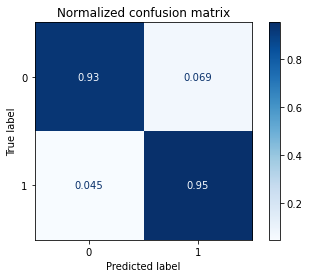

In [60]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [61]:
y_pred_prob = classifier.predict_proba(X_test)

In [62]:
y_pred_prob[0:5]

array([[0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ]])

In [63]:
y_pred_prob[0:5,1]

array([0.4, 0. , 0.4, 0. , 0. ])

In [64]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [65]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9439655172413792

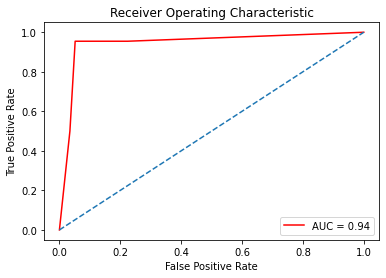

In [66]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [68]:
dataf.head(5)

,0,1,0,0,0,1
0,-0.496186,0.560214,0,0,0.6,0.4
1,0.238904,-0.591337,0,0,1.0,0.0
2,-0.036755,0.186738,0,0,0.6,0.4
3,-0.496186,0.311230,0,0,1.0,0.0
4,-0.036755,-0.591337,0,0,1.0,0.0


In [69]:
dataf.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']

In [70]:
dataf.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,-0.496186,0.560214,0,0,0.6,0.4
1,0.238904,-0.591337,0,0,1.0,0.0
2,-0.036755,0.186738,0,0,0.6,0.4
3,-0.496186,0.311230,0,0,1.0,0.0
4,-0.036755,-0.591337,0,0,1.0,0.0
5,-0.771845,-1.525026,0,0,1.0,0.0
6,-0.404300,-1.680641,0,0,1.0,0.0
7,0.055132,2.334224,1,1,0.0,1.0
8,-1.598822,-0.031123,0,0,1.0,0.0
9,1.065881,-0.809198,0,1,0.2,0.8


In [104]:
dataf.to_csv('E:/Bases/Kaggle/Social Network Ads/dataf.csv', index = False)